# Symantic Parsing - Bag of words

In [29]:
#Import necessary libraries
import re
import nltk
import math
import string
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from scipy.sparse import csr_matrix
import scipy as sp
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

get_ipython().run_line_magic('matplotlib', 'inline')

from collections import defaultdict

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
# open test file and read its lines
with open("train.dat", 'r') as fh:
    lines = fh.readlines()

In [31]:
#spliting the scentences into words
data = [l.split() for l in lines]


In [32]:
#obtaining the class labels from documents
labels = []
words = []
for i in range (0,len(data)):
    labels.append(data[i][0])
    words.append(data[i][1:])

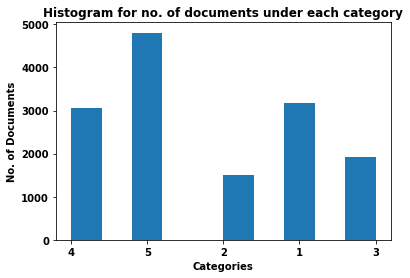

In [63]:
plt.title('Histogram for no. of documents under each category')
plt.xlabel('Categories')
plt.ylabel('No. of Documents')
plt.hist(labels)
plt.show()

In [33]:
#Visualising the class labels for each parah
table = np.array(words)
table_df = pd.DataFrame({'Document': words, 
                          'Category': labels})
table_df = table_df[['Document', 'Category']]
table_df

,Document,Category
0,"[Catheterization, laboratory, events, and, hos...",4
1,"[Renal, abscess, in, children., Three, cases, ...",5
2,"[Hyperplastic, polyps, seen, at, sigmoidoscopy...",2
3,"[Subclavian, artery, to, innominate, vein, fis...",5
4,"[Effect, of, local, inhibition, of, gamma-amin...",4
5,"[Infection, during, chronic, epidural, cathete...",1
6,"[Mediastinal, tracheostomy, using, a, pectoral...",5
7,"[Tumefactive, fibroinflammatory, lesion, of, t...",5
8,"[Multiple, representations, contribute, to, bo...",3
9,"[Increasing, asthma, prevalence, in, a, rural,...",5


In [34]:
from sklearn.feature_extraction.text import CountVectorizer


In [35]:
X = CountVectorizer(tokenizer=lambda doc:doc, lowercase=False).fit_transform(words)

In [36]:
type(X)

scipy.sparse.csr.csr_matrix

In [37]:
# Separating Test and Train data 
Train_words = X[0:10000]
Test_words = X[10000:]
Train_label = labels[0:10000]
Test_label = labels[10000:]

# K Nearest Neighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
clf = KNeighborsClassifier(n_neighbors=30,metric='cosine')

In [40]:
clf.fit(Train_words,Train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [41]:
pred=clf.predict(Test_words)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(Test_label,pred))

             precision    recall  f1-score   support

          1       0.44      0.71      0.54       961
          2       0.49      0.10      0.17       440
          3       0.46      0.08      0.13       581
          4       0.58      0.46      0.51       922
          5       0.42      0.54      0.47      1534

avg / total       0.47      0.45      0.42      4438



In [44]:
import itertools

In [45]:
def plot_classification_report(classificationReport,
                              title='Classification report',
                              cmap='RdBu'):
    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')
    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
            t = line.strip().replace(' avg', '-avg').split()
            if len(t) < 2:
                   continue
            classes.append(t[0])
            v = [float(x) for x in t[1: len(t) - 1]]
            support.append(int(t[-1]))
            class_names.append(t[0])
            plotMat.append(v)
    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                  for idx, sup in enumerate(support)]
    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)
    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")
    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()

In [46]:
report=classification_report(Test_label,pred)

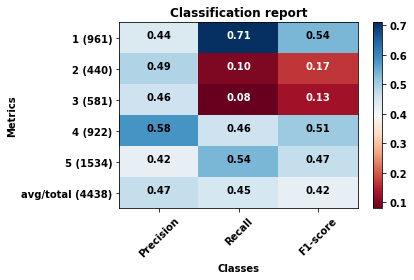

In [47]:
plot_classification_report(report)
plt.show()
plt.close()

# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
clf = DecisionTreeClassifier(max_features=2000)

In [50]:
clf.fit(Train_words,Train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=2000, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
pred=clf.predict(Test_words)

In [61]:
print(classification_report(Test_label,pred))

             precision    recall  f1-score   support

          1       0.50      0.56      0.52       961
          2       0.24      0.27      0.26       440
          3       0.28      0.28      0.28       581
          4       0.48      0.49      0.49       922
          5       0.33      0.29      0.31      1534

avg / total       0.38      0.38      0.38      4438



In [62]:
report=classification_report(Test_label,pred)

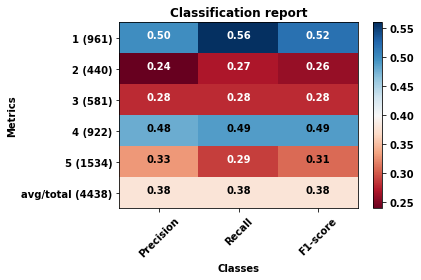

In [63]:
plot_classification_report(report)
plt.show()
plt.close()

# Extra Trees Classifier

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

In [23]:
clf = ExtraTreesClassifier(n_estimators=200, max_features=200,random_state=7)

In [24]:
clf.fit(Train_words,Train_label)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=200, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=7, verbose=0, warm_start=False)

In [ ]:
pred=clf.predict(Test_words)

In [18]:
print(classification_report(Test_label,pred))

             precision    recall  f1-score   support

          1       0.49      0.53      0.51       961
          2       0.26      0.30      0.28       440
          3       0.26      0.26      0.26       581
          4       0.47      0.48      0.47       922
          5       0.32      0.28      0.30      1534

avg / total       0.37      0.37      0.37      4438



In [19]:
report=classification_report(Test_label,pred)

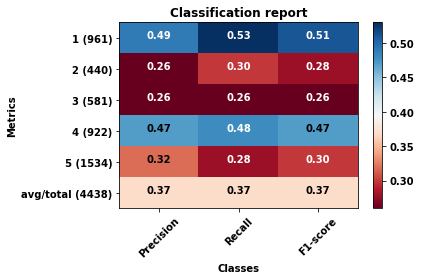

In [22]:
plot_classification_report(report)
plt.show()
plt.close()

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf=LogisticRegression()

In [55]:
clf.fit(Train_words,Train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
print(classification_report(Test_label,pred))

             precision    recall  f1-score   support

          1       0.44      0.71      0.54       961
          2       0.49      0.10      0.17       440
          3       0.46      0.08      0.13       581
          4       0.58      0.46      0.51       922
          5       0.42      0.54      0.47      1534

avg / total       0.47      0.45      0.42      4438



In [57]:
report=classification_report(Test_label,pred)

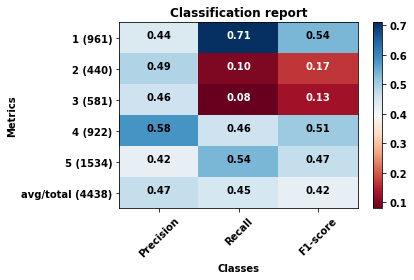

In [58]:
plot_classification_report(report)
plt.show()
plt.close()

# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
clf = RandomForestClassifier(n_estimators=200,max_features=1000, max_depth=40,random_state=1)

In [64]:
clf.fit(Train_words,Train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features=1000, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [65]:
print(classification_report(Test_label,pred))

             precision    recall  f1-score   support

          1       0.44      0.71      0.54       961
          2       0.49      0.10      0.17       440
          3       0.46      0.08      0.13       581
          4       0.58      0.46      0.51       922
          5       0.42      0.54      0.47      1534

avg / total       0.47      0.45      0.42      4438



In [66]:
report=classification_report(Test_label,pred)

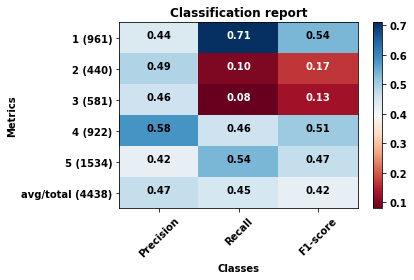

In [67]:
plot_classification_report(report)
plt.show()
plt.close()